# **Passing object with relativistic speed as seen by an observer in special relativiy**

### Mikołaj Korzyński

#### Creates plots, animations etc. of a luminous point source with constant velocity passing an observer at relativistic speed
---

## **0. Imports etc.**

In [26]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy as sp
from scipy import misc



## **1. Defining the time of arrival function**

> #### **Note:** We will assume $c=1$ throughout this notebook.
> It follows that:
> -  $\vec v_S$ is dimensionless, i.e. $\vec v_S = \frac{\vec v_{S\,old}}{c}$
> - time is measured in distance units, i.e. $t = c\,t_{old}$
> - $b$ is measured in distance units

We assume that the body (point source) passes us with velocity $\vec v_S$, with minimal distance $b$, corresponding to position $\vec b$. We describe the situation in the observer's frame, which we assume to be inertial. Since $\vec b$ is the point of minimal distance, we have $$\vec b\cdot\vec v_S=0.$$

![Fig. 1](passing-object-fig1.png/passing-object-fig1.png.001.png)

Let:
- $t_E$ denote the emission coordinate time,
- $t_O$ denote the observation coordinate time,
- $v_s = |\vec v_s|$

Then:
$$ t_E(t_O, b, v_S) = \frac{t_O - \sqrt{b^2 + v_S^2(t_O^2-b^2)}}{1-v_S^2}$$
and the inverse relation
$$ t_O(t_E) = t_E + \sqrt{b^2+v_S^2\,t_E^2}.$$

See the notebook `"TOA for a passing body in SR"` on my Onyx Boox Notes.




In [27]:
def tE_of_tO(tO, b, v_S):
    """Yields the emission time in terms of the observation time"""
    return (tO - np.sqrt(b**2 + v_S**2 * (tO**2 - b**2))) / (1 - v_S**2)


def tO_of_tE(tE, b, v_S):
    """Yields the observation time in terms of the emission time"""
    return tE + np.sqrt(b**2 + v_S**2 * tE**2)



Let's now make a few plots of these functions.

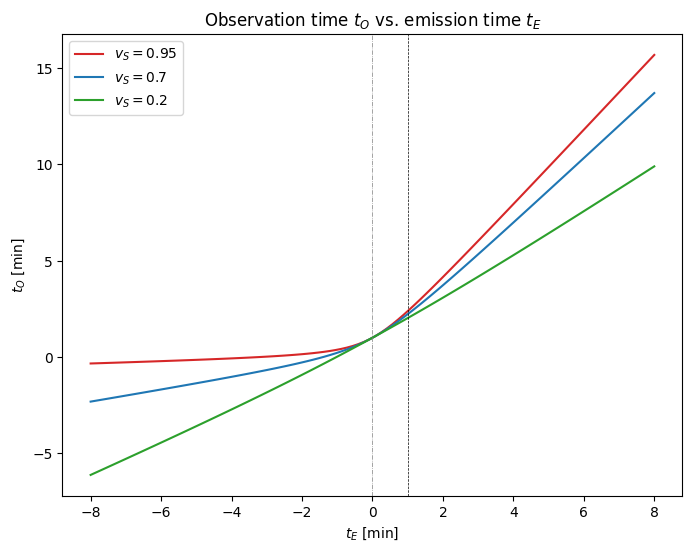

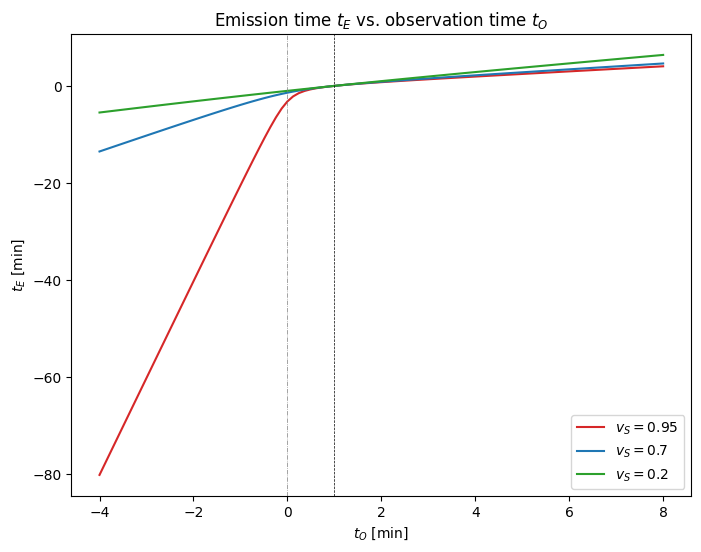

In [28]:
# -------------
# Emission time
# -------------
t = np.linspace(-8., 8., 100)

plt.figure(figsize=(8, 6))
plt.title(r'Observation time $t_O$ vs. emission time $t_E$')
plt.xlabel(r'$t_E$ [min]')
plt.ylabel(r'$t_O$ [min]')
plt.plot(t, tO_of_tE(t, b=1., v_S=0.95), label=r'$v_S = 0.95$', color='tab:red')     # b [min]
plt.plot(t, tO_of_tE(t, b=1., v_S=0.7), label=r'$v_S = 0.7$', color='tab:blue')
plt.plot(t, tO_of_tE(t, b=1., v_S=0.2), label=r'$v_S = 0.2$', color='tab:green')

# Add vertical lines
plt.axvline(x=0., linestyle='-.', linewidth=0.5, color='tab:gray')
plt.axvline(x=1., linestyle='dashed', linewidth=0.5, color='black')

plt.legend()
plt.show()

# ----------------
# Observation time
# ----------------
t = np.linspace(-4., 8., 100)

plt.figure(figsize=(8, 6))
plt.title(r'Emission time $t_E$ vs. observation time $t_O$')
plt.xlabel(r'$t_O$ [min]')
plt.ylabel(r'$t_E$ [min]')
plt.plot(t, tE_of_tO(t, b=1., v_S=0.95), label=r'$v_S = 0.95$', color='tab:red')
plt.plot(t, tE_of_tO(t, b=1., v_S=0.7), label=r'$v_S = 0.7$', color='tab:blue')
plt.plot(t, tE_of_tO(t, b=1., v_S=0.2), label=r'$v_S = 0.2$', color='tab:green')

# Add vertical lines
plt.axvline(x=0., linestyle='-.', linewidth=0.5, color='tab:gray')
plt.axvline(x=1., linestyle='dashed', linewidth=0.5, color='black')

plt.legend()
plt.show()

### **1.1 Checking if they are inverse of each other**

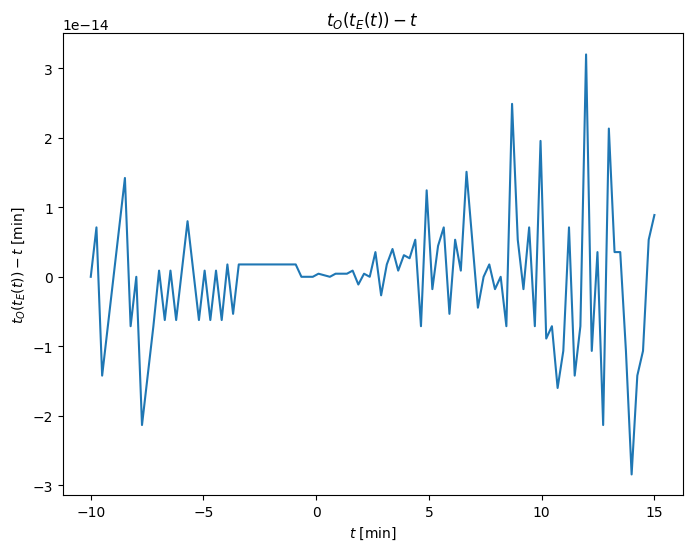

In [29]:
t = np.linspace(-10., 15., 100)
kwargs = dict(
    b=1.,
    v_S=0.95
)

t_back = tO_of_tE(tE_of_tO(t, **kwargs), **kwargs)

assert np.allclose(t, t_back)
plt.figure(figsize=(8, 6))
plt.title(r'$t_O\left(t_E(t)\right) - t$')
plt.xlabel(r'$t$ [min]')
plt.ylabel(r'$t_O(t_E(t)) - t$ [min]')
plt.plot(t, t_back - t, color='tab:blue')

## **2. Position on the observer's celestial sphere**

We assume the motion of the source to be
$$ \vec x_S = \vec b + \vec v_S\,t$$
in coordinate time.

The apparent position on the sky is
$$\vec r = \frac{\vec x}{|\vec x|}.$$
We can also parametrize it by angle $\varphi \in [0, \pi]$ defined via
$$\varphi = -\arccos \vec r\cdot \hat e_v  + \frac{\pi}{2}$$
with $\hat e_v = \frac{\vec v_S}{|\vec v_S|}$. This means that
$$\varphi = -\arccos \left(\frac{v_S\,t}{\sqrt{b^2 + v_S^2\,t^2}}\right) + \frac{\pi}{2},$$
or, equivalently,
$$\varphi = \arcsin\left(\vec r \cdot \hat e_v\right)$$
or
$$\varphi = \arcsin\left(\frac{v_S\,t}{\sqrt{v_S^2\,t^2+b^2}}\right).$$
This is supposed to be $t=t_E(t_O)$, i.e. 
$$\varphi(t_O) = -\arccos \left(\frac{v_S\,t_E(t_O)}{\sqrt{b^2 + v_S^2\,t_E(t_O)^2}} \right) + \frac{\pi}{2}.$$

We will now make a few plots.

### **2.1 Plots of the angle vs. observer's time**

Define the function first:

In [30]:
def varphi_of_tE(tE, b, v_S):
    # return -np.arccos(v_S * tE / np.sqrt(v_S**2 + (v_S * tE)**2)) + np.pi/2
    position_E = v_S * tE
    return np.arcsin(position_E / np.sqrt(b**2 + position_E**2))
    # return np.arccos(-position_E / np.sqrt(position_E**2 + b**2))

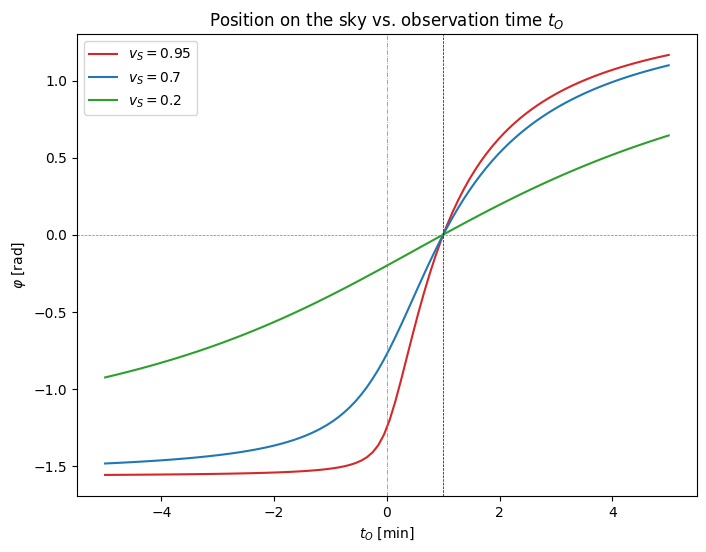

In [31]:
t = np.linspace(-5., 5., 100)
plt.figure(figsize=(8, 6))
plt.title(r'Position on the sky vs. observation time $t_O$')
plt.xlabel(r'$t_O$ [min]')
plt.ylabel(r'$\varphi$ [rad]')

kwargs = dict(b=1., v_S=0.95)    # b[min], b := b_Old / c
plt.plot(t, varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), label=r'$v_S = 0.95$', color='tab:red')

kwargs = dict(b=1., v_S=0.7)
plt.plot(t, varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), label=r'$v_S = 0.7$', color='tab:blue')

kwargs = dict(b=1., v_S=0.2)
plt.plot(t, varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), label=r'$v_S = 0.2$', color='tab:green')

# Add vertical and horizontal lines
plt.axhline(y=0., color='tab:grey', linestyle='--', linewidth=0.5)
plt.axvline(x=0., color='tab:grey', linestyle='-.', linewidth=0.5)
plt.axvline(x=1., color='black', linestyle='dashed', linewidth=0.5)

plt.legend()
plt.show()



The same, but closer to the nearest point.

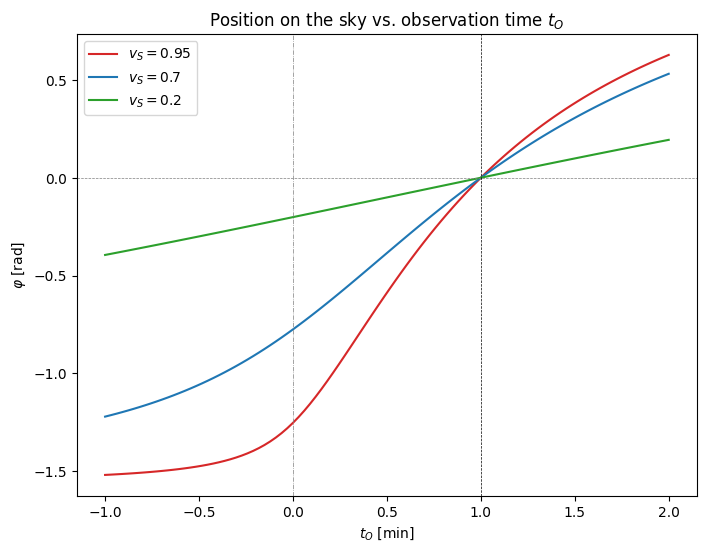

In [32]:
t = np.linspace(-1., 2., 100)
plt.figure(figsize=(8, 6))
plt.title(r'Position on the sky vs. observation time $t_O$')
plt.xlabel(r'$t_O$ [min]')
plt.ylabel(r'$\varphi$ [rad]')

kwargs = dict(b=1., v_S=0.95)
plt.plot(t, varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), label=r'$v_S = 0.95$', color='tab:red')

kwargs = dict(b=1., v_S=0.7)
plt.plot(t, varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), label=r'$v_S = 0.7$', color='tab:blue')

kwargs = dict(b=1., v_S=0.2)
plt.plot(t, varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), label=r'$v_S = 0.2$', color='tab:green')

# Add vertical and horizontal lines
plt.axhline(y=0., color='tab:grey', linestyle='--', linewidth=0.5)
plt.axvline(x=0., color='tab:grey', linestyle='-.', linewidth=0.5)
plt.axvline(x=1., color='black', linestyle='dashed', linewidth=0.5)

plt.legend()
plt.show()

## **3. Redshift as a function of the observer's time $t_O$**

The redshift is defined as
$$ z = \frac{l_\mu\,u_{E}^{\mu}}{l_\nu\,u_{O}^{\nu}} - 1$$
with
- $l_{\mu} = \begin{pmatrix} 1 & \vec r \end{pmatrix}$, 

- $u_{O}^\mu = \begin{pmatrix} 1 \\ \vec 0 \end{pmatrix}$,  

- $u_E^\mu = \begin{pmatrix} \gamma_S \\ \gamma_S\,\vec v_S \end{pmatrix}$.
Therefore we have
$$ z = \gamma_S(1 + \vec v_S\cdot\vec r) - 1=\frac{1 + \vec v_S\cdot\vec r}{\sqrt{1 - v_S^2}} - 1 = \frac{1 +  v_S\,\hat e_v\cdot\vec r}{\sqrt{1 - v_S^2}}  - 1 = \frac{1 +  v_S\,\sin\varphi}{\sqrt{1 - v_S^2}} - 1$$


In [33]:
def z_of_varphi(varphi, v_S, b):
    """Redshift vs varphi (position on the celestial sphere)"""
    return  (1. + v_S * np.sin(varphi)) / np.sqrt(1 - v_S**2) - 1.

### **3.1 Plots of the redshift**

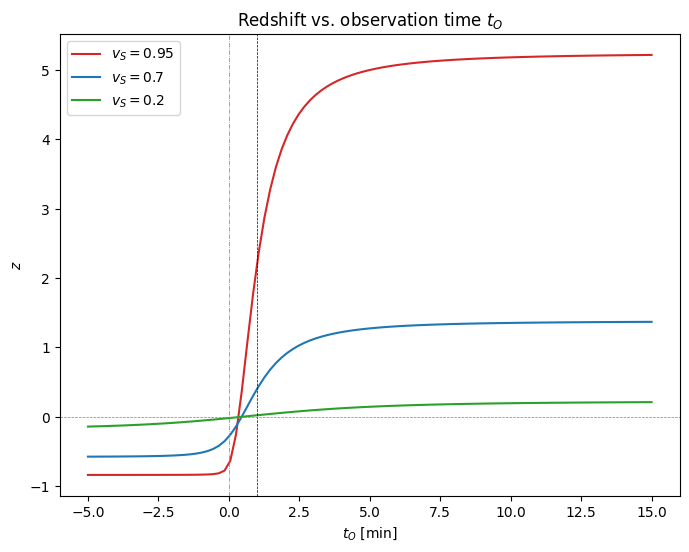

In [34]:
t = np.linspace(-5., 15., 100)
plt.figure(figsize=(8, 6))
plt.title(r'Redshift vs. observation time $t_O$')
plt.xlabel(r'$t_O$ [min]')
plt.ylabel(r'$z$')

kwargs = dict(b=1., v_S=0.95)
plt.plot(t, z_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), **kwargs), label=r'$v_S = 0.95$', color='tab:red')

kwargs = dict(b=1., v_S=0.7)
plt.plot(t, z_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), **kwargs), label=r'$v_S = 0.7$', color='tab:blue')

kwargs = dict(b=1., v_S=0.2)
plt.plot(t, z_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), **kwargs), label=r'$v_S = 0.2$', color='tab:green')

# Add vertical and horizontal lines
plt.axvline(x=0., color='tab:grey', linestyle='-.', linewidth=0.5)
plt.axvline(x=1., color='black', linestyle='dashed', linewidth=0.5)
plt.axhline(y=0., color='tab:grey', linestyle='dashed', linewidth=0.5)

plt.legend()
plt.show()

The same for the log redshift $\zeta = \ln (1+z)$

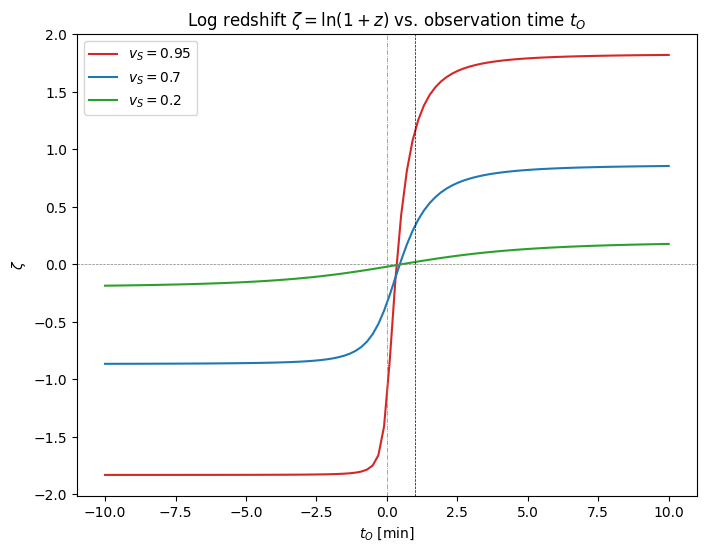

In [35]:
t = np.linspace(-10., 10., 100)
plt.figure(figsize=(8, 6))
plt.title(r'Log redshift $\zeta = \ln(1+z)$ vs. observation time $t_O$')
plt.xlabel(r'$t_O$ [min]')
plt.ylabel(r'$\zeta$')

kwargs = dict(b=1., v_S=0.95)
plt.plot(t, np.log(z_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), **kwargs) + 1.), label=r'$v_S = 0.95$', color='tab:red')

kwargs = dict(b=1., v_S=0.7)
plt.plot(t, np.log(z_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), **kwargs) + 1.), label=r'$v_S = 0.7$', color='tab:blue')

kwargs = dict(b=1., v_S=0.2)
plt.plot(t, np.log(z_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), **kwargs) + 1.), label=r'$v_S = 0.2$', color='tab:green')

# Add vertical and horizontal lines
plt.axvline(x=0., color='tab:grey', linestyle='-.', linewidth=0.5)
plt.axvline(x=1., color='black', linestyle='dashed', linewidth=0.5)
plt.axhline(y=0., color='tab:grey', linestyle='dashed', linewidth=0.5)

plt.legend()
plt.show()

### **3.2 Comparison with direct differentiation of $t_E(t_O)$.**
Let $\tau_E$ denote the proper time of the emitter (source), i.e.
$$\tau_E = \frac{1}{\gamma_S}\,t_E = \sqrt{1-v_S^2}\,t_E.$$
Recall that
$$ \frac{dt_O}{d\tau_E}=1+z,$$
so
$$ 1+z = \frac{dt_O}{d\tau_E} = \frac{dt_O}{dt_E}\,\frac{dt_E}{d\tau_E} = \sqrt{1-v_S^2}\,\frac{dt_O}{dt_E} = \sqrt{1-v_S^2}\,\left(\frac{dt_E}{dt_O}\right)^{-1}.$$
It follows then that
$$ z = \sqrt{1-v_S^2}\,\frac{dt_O}{dt_E} - 1$$
and
$$ \zeta = \ln \frac{dt_O}{d\tau_E} = -\ln\frac{d\tau_E}{dt_O}= -\ln{\frac{dt_E}{dt_O}} - \frac{1}{2}\ln(1-v_S^2).$$


#### **Asymptotics of $z$ and $\zeta$ as $t\to \pm \infty$**
In the asymptotic case ($t \to \pm\infty$) we have pure radial Doppler shift, i.e.
- for $t \to +\infty$ we have  $z \to z_+$ and $\zeta \to \zeta_+$, with 
$$ z_+ = \frac{\sqrt{1+v_S}}{\sqrt{1-v_S}} - 1$$
$$ \zeta_+ = \frac{1}{2}\ln\left(\frac{1+v_S}{1-v_S}\right) $$
 - for $t \to -\infty$ we have $z \to z_-$ and $\zeta \to \zeta_-$, with
$$ z_- = \frac{\sqrt{1-v_S}}{\sqrt{1+v_S}} - 1$$
$$ \zeta_- = \frac{1}{2}\ln\left(\frac{1-v_S}{1+v_S}\right)= -\zeta_+$$

We will use `scipy.misc.derivative()` for numerical differentiation.

np.exp(-zeta_numerical[0] + zeta_analytical[0])=0.9999999999380624


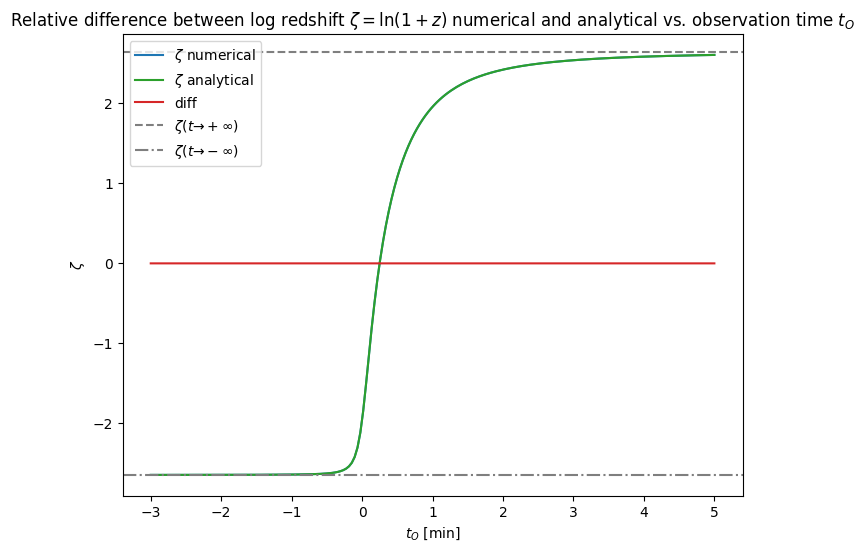

In [36]:
t = np.linspace(-3., 5., 200)
kwargs = dict(b=1., v_S=0.99)

def zeta_of_tO(tO, v_S, b):
    """Application of the formula above, using numerical differentiation"""
    return -np.log(misc.derivative(func=lambda tO_x: tE_of_tO(tO_x,  b=b, v_S=v_S), x0=tO, dx=0.001)) - 0.5*np.log(1 - v_S**2)
    #return -np.log((tE_of_tO(tO + 0.01,  b=b, v_S=v_S) - tE_of_tO(tO,  b=b, v_S=v_S)) / 0.01) - 0.5*np.log(1 - v_S**2)


zeta_numerical = np.array([zeta_of_tO(tO, **kwargs) for tO in t])
zeta_analytical = np.log(z_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), **kwargs) + 1.) 



print(f"{np.exp(-zeta_numerical[0] + zeta_analytical[0])=}")

difference_zeta = -zeta_numerical + zeta_analytical

# Asymptotes
zeta_plus = 0.5 * np.log((1 + kwargs['v_S']) / (1 - kwargs['v_S']))   # t to plus infinity
zeta_minus = 0.5 * np.log((1 - kwargs['v_S']) / (1 + kwargs['v_S']))  # t to minus infinity

# the plot
plt.figure(figsize=(8, 6))
plt.title(r'Relative difference between log redshift $\zeta = \ln(1+z)$ numerical and analytical vs. observation time $t_O$')
plt.xlabel(r'$t_O$ [min]')
plt.ylabel(r'$\zeta$')

plt.plot(t, zeta_numerical, label=r'$\zeta$ numerical', color='tab:blue')
plt.plot(t, zeta_analytical, label=r'$\zeta$ analytical', color='tab:green')
plt.plot(t, zeta_analytical - zeta_numerical, label='diff', color='tab:red')
plt.axhline(y=zeta_plus, color='tab:grey', linestyle='dashed', label=r'$\zeta(t\to + \infty)$')
plt.axhline(y=zeta_minus, color='tab:grey', linestyle='-.', label=r'$\zeta(t\to - \infty)$')
plt.legend()
plt.show()

Success, both curves coincide!

## **4. Apparent luminosity - energy flux**

In [34]:
...

Ellipsis

## **5. Position drift**

We apply the position drift formula from paper  M. Korzyński, J. Kopiński, *Optical drift effects in general relativity*, JCAP:
$$\delta_{\cal O} r^A = |\vec x_S|^{-1}\left(\frac{1}{1+z}\,u_S - u_O\right)^A.$$
Recall that
$$\frac{1}{1+z} = \frac{\sqrt{1-v_S^2}}{1 + v_S\,\sin\varphi},$$
thus
$$\frac{1}{1+z}u_S - u_O = \begin{pmatrix} -\frac{v_S\,\sin\varphi}{1+v_S\,\sin\varphi} \\ 0 \\ 0 \\ \frac{v_S}{1+v_S\,\sin\varphi} \end{pmatrix}.$$
We need to project this to a transverse vector $\hat e_{tr}$:
$$ \vec r = \begin{pmatrix} 0 \\ 0 \\ \cos\varphi \\ \sin\varphi \end{pmatrix} $$
$$ \hat e_{tr} = \begin{pmatrix} 0 \\ 0 \\ -\sin\varphi \\ \cos\varphi \end{pmatrix}. $$

In this case:
$$\delta_{\cal O} r^\varphi \equiv \dot \varphi = \frac{v_S\,\cos\varphi}{|\vec x_S|\,(1+v_S\,\sin\varphi)}.$$
Now we use $|\vec x_S| = \sqrt{b^2 + v_S\,t_E^2}$:
$$\dot \varphi = \frac{v_S\,\cos\varphi}{(1 + v_S\,\sin\varphi)\sqrt{b^2 + v_S^2\,t_E^2}}.$$
We can also plug in $\cos\varphi = \frac{b}{\sqrt{b^2 + v_S^2\,t_E^2}}$ (but not $\sin\varphi = \frac{v_S\,t_E}{\sqrt{b^2 + v_S^2\,t_E^2}}$):
$$\dot \varphi = \frac{v_S\,\cos^2\varphi}{b\,(1 + v_S\,\sin\varphi)}.$$
#### ***TODO***: now try to get rid of $\varphi$ in this formula using expressions for $\sin\varphi$ and $\cos\varphi$.

Defining the function:

In [38]:
def dotvarphi_of_varphi(varphi, b, v_S):
    """
    """
    return v_S * np.cos(varphi)**2 / (b * (1 + v_S * np.sin(varphi)))

Making a plot:

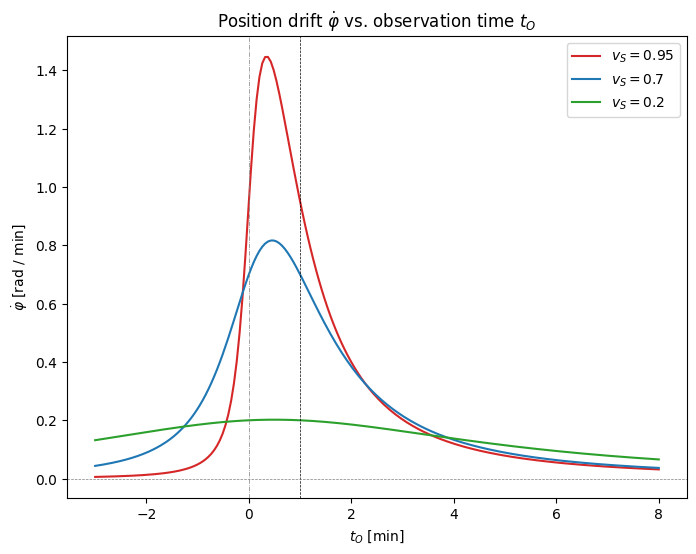

In [45]:
t = np.linspace(-3., 8., 200)
plt.figure(figsize=(8, 6))
plt.title(r'Position drift $\dot\varphi$ vs. observation time $t_O$')
plt.xlabel(r'$t_O$ [min]')
plt.ylabel(r'$\dot\varphi$ [rad / min]')

kwargs = dict(b=1., v_S=0.95)
plt.plot(t, dotvarphi_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), **kwargs), label=r'$v_S = 0.95$', color='tab:red')

kwargs = dict(b=1., v_S=0.7)
plt.plot(t, dotvarphi_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), **kwargs), label=r'$v_S = 0.7$', color='tab:blue')

kwargs = dict(b=1., v_S=0.2)
plt.plot(t, dotvarphi_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs), **kwargs), label=r'$v_S = 0.2$', color='tab:green')

# Add vertical and horizontal lines
plt.axvline(x=0., color='tab:grey', linestyle='-.', linewidth=0.5)
plt.axvline(x=1., color='black', linestyle='dashed', linewidth=0.5)
plt.axhline(y=0., color='tab:grey', linestyle='dashed', linewidth=0.5)

plt.legend()
plt.show()

Now, we make a comparison with numerical differentiation:

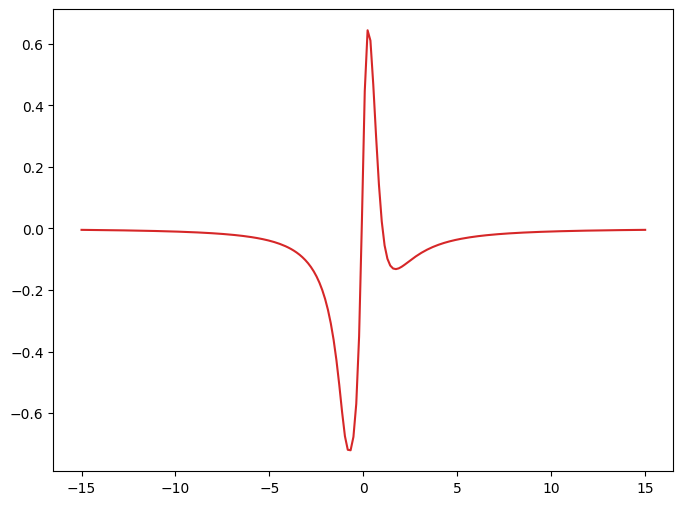

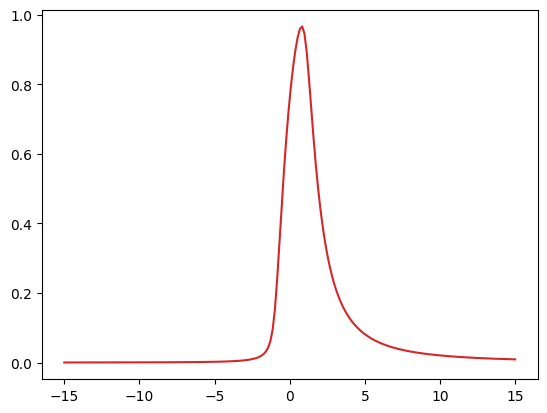

In [40]:
plt.figure(figsize=(8, 6))
t = np.linspace(-15., 15., 200)
kwargs = dict(b=1., v_S=0.95)

num_dotvarphi_of_tE = np.array(
    [misc.derivative(
        func=lambda x0: varphi_of_tE(tE_of_tO(x0, **kwargs), **kwargs),
        x0 = t0
    ) for t0 in t]
)

difference = (dotvarphi_of_varphi(varphi_of_tE(tE_of_tO(t, **kwargs), **kwargs) ,**kwargs) - num_dotvarphi_of_tE) / num_dotvarphi_of_tE
plt.plot(t, difference, label=r'$v_S = 0.95$', color='tab:red')
plt.show()

plt.plot(t, num_dotvarphi_of_tE, label=r'$v_S = 0.95$', color='tab:red')
plt.show()

...This is a big difference, so we are not OK yet.

### ***TODO:*** correct that

## **6. Redshift drift**

In [38]:
...

Ellipsis

---
## ***Scratch notes***

In [42]:
l = list(range(10))

print(f"{l=}")

l=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [43]:
l[19:19] = [-9, -9]
print(f"{l=}")

l=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -9, -9]


In [44]:
x = np.linspace(-2., 2., 50)

kwargs = dict(
    b=1.,
    v_S=0.9
)

def zeta_of_tO2(tO, b, v_S):
    return -np.log(misc.derivative(
                        func=lambda  t0: tE_of_tO(t0, b, v_S),
                        x0=tO
                    
             ))
    

    

derivative_array1 = np.array([-np.log(misc.derivative(
                        func=lambda  t0: tE_of_tO(t0, **kwargs),
                        x0=tO)) for tO in x])


derivative_array2 = np.array([zeta_of_tO2(tO, **kwargs) for tO in x])

print(f"{derivative_array1/derivative_array2=}")

derivative_array1/derivative_array2=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
